<a href="https://colab.research.google.com/github/tassandro/VIX/blob/main/VIX_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('VIXCLS.csv')
df.head()

,observation_date,VIXCLS
0,2020-03-04,31.99
1,2020-03-05,39.62
2,2020-03-06,41.94
3,2020-03-09,54.46
4,2020-03-10,47.30


In [7]:
df['DATE'] = pd.to_datetime(df['observation_date'])

In [10]:
output_dir = 'split_by_date_vix'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for date, group in df.groupby(df['DATE'].dt.date):
    filename = f"{output_dir}/{date}_vix.csv"
    group.to_csv(filename, index=False)
    print(f"Salvo: {filename}")

Salvo: split_by_date_vix/2020-03-04_vix.csv
Salvo: split_by_date_vix/2020-03-05_vix.csv
Salvo: split_by_date_vix/2020-03-06_vix.csv
Salvo: split_by_date_vix/2020-03-09_vix.csv
Salvo: split_by_date_vix/2020-03-10_vix.csv
Salvo: split_by_date_vix/2020-03-11_vix.csv
Salvo: split_by_date_vix/2020-03-12_vix.csv
Salvo: split_by_date_vix/2020-03-13_vix.csv
Salvo: split_by_date_vix/2020-03-16_vix.csv
Salvo: split_by_date_vix/2020-03-17_vix.csv
Salvo: split_by_date_vix/2020-03-18_vix.csv
Salvo: split_by_date_vix/2020-03-19_vix.csv
Salvo: split_by_date_vix/2020-03-20_vix.csv
Salvo: split_by_date_vix/2020-03-23_vix.csv
Salvo: split_by_date_vix/2020-03-24_vix.csv
Salvo: split_by_date_vix/2020-03-25_vix.csv
Salvo: split_by_date_vix/2020-03-26_vix.csv
Salvo: split_by_date_vix/2020-03-27_vix.csv
Salvo: split_by_date_vix/2020-03-30_vix.csv
Salvo: split_by_date_vix/2020-03-31_vix.csv
Salvo: split_by_date_vix/2020-04-01_vix.csv
Salvo: split_by_date_vix/2020-04-02_vix.csv
Salvo: split_by_date_vix/2020-04

In [13]:
all_dfs = []
for file in os.listdir(output_dir):
    if file.endswith('_vix.csv'):
        file_path = os.path.join(output_dir, file)
        daily_df = pd.read_csv(file_path)
        all_dfs.append(daily_df)

combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df['DATE'] = pd.to_datetime(combined_df['DATE'])
combined_df = combined_df.sort_values('DATE')

print("Formato do dataframe combinado:", combined_df.shape)
print(combined_df.head())

Formato do dataframe combinado: (1305, 3)
     observation_date  VIXCLS       DATE
1275       2020-03-04   31.99 2020-03-04
770        2020-03-05   39.62 2020-03-05
533        2020-03-06   41.94 2020-03-06
7          2020-03-09   54.46 2020-03-09
1087       2020-03-10   47.30 2020-03-10


In [15]:
# Calcular volatilidade móvel (janela de 30 dias)
combined_df['VIX_Rolling_STD'] = combined_df['VIXCLS'].rolling(window=30).std()

# Identificar picos de risco (VIX > 30 é um limiar comum para crises)
combined_df['High_Risk'] = combined_df['VIXCLS'] > 30

# Calcular média móvel para suavizar tendências (janela de 30 dias)
combined_df['VIX_Rolling_Mean'] = combined_df['VIXCLS'].rolling(window=30).mean()

print(combined_df.tail())

     observation_date  VIXCLS       DATE  VIX_Rolling_STD  High_Risk  \
1028       2025-02-26   19.10 2025-02-26         1.353710      False   
1160       2025-02-27   21.13 2025-02-27         1.611927      False   
268        2025-02-28   19.63 2025-02-28         1.706969      False   
276        2025-03-03   22.78 2025-03-03         2.036643      False   
576        2025-03-04   23.51 2025-03-04         2.342765      False   

      VIX_Rolling_Mean  
1028         16.338333  
1160         16.489333  
268          16.611333  
276          16.843667  
576          17.125333  


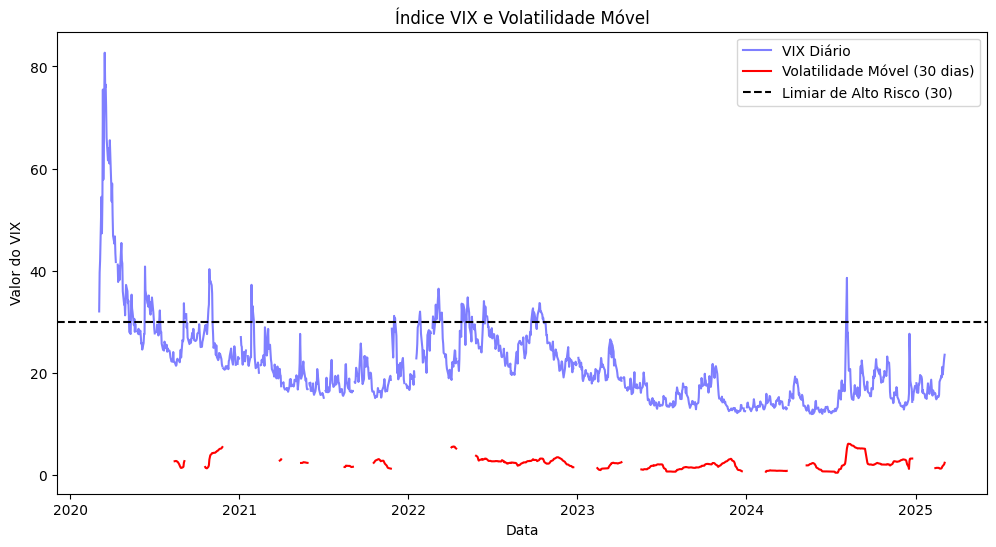

In [16]:
# Gráfico 1: VIX e Volatilidade Móvel
plt.figure(figsize=(12, 6))
plt.plot(combined_df['DATE'], combined_df['VIXCLS'], label='VIX Diário', color='blue', alpha=0.5)
plt.plot(combined_df['DATE'], combined_df['VIX_Rolling_STD'], label='Volatilidade Móvel (30 dias)', color='red')
plt.axhline(y=30, color='black', linestyle='--', label='Limiar de Alto Risco (30)')
plt.title('Índice VIX e Volatilidade Móvel')
plt.xlabel('Data')
plt.ylabel('Valor do VIX')
plt.legend()
plt.show()

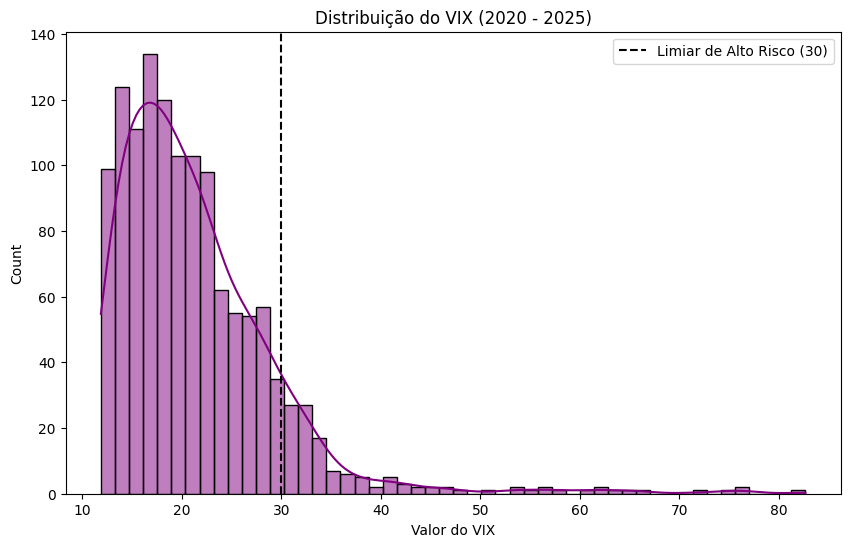

In [18]:
# Gráfico 2: Distribuição do VIX com Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['VIXCLS'], bins=50, kde=True, color='purple')
plt.axvline(x=30, color='black', linestyle='--', label='Limiar de Alto Risco (30)')
plt.title('Distribuição do VIX (2020 - 2025)')
plt.xlabel('Valor do VIX')
plt.legend()
plt.show()

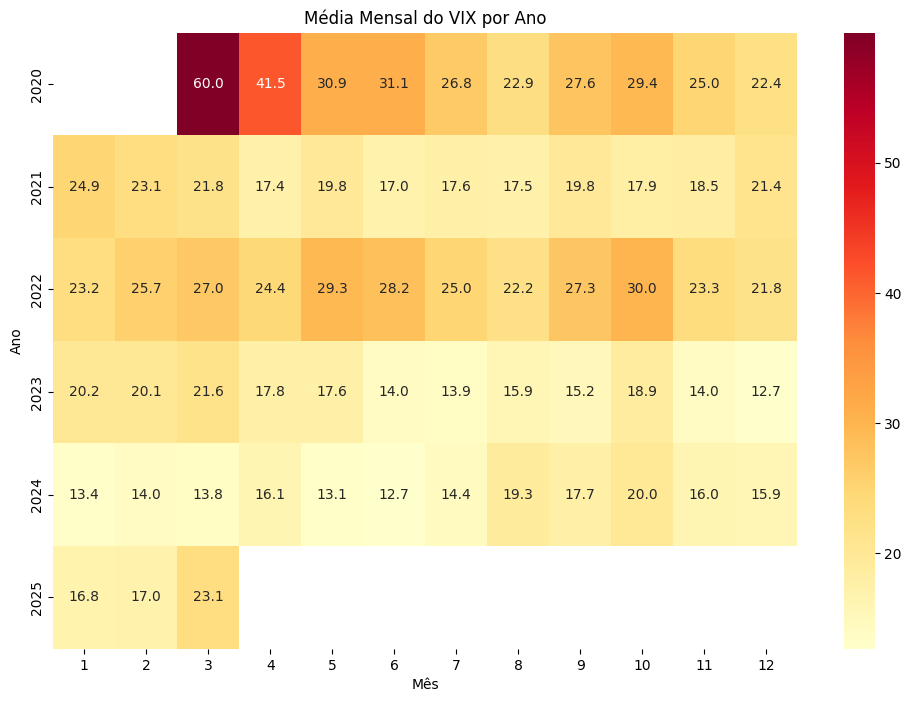

In [19]:
# Gráfico 3: Heatmap de Risco por Ano e Mês
combined_df['Year'] = combined_df['DATE'].dt.year
combined_df['Month'] = combined_df['DATE'].dt.month
risk_pivot = combined_df.pivot_table(values='VIXCLS', index='Year', columns='Month', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(risk_pivot, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title('Média Mensal do VIX por Ano')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.show()

In [20]:
# Resumo estatístico
print("Estatísticas do VIX:")
print(combined_df['VIXCLS'].describe())

# Percentual de dias de alto risco
high_risk_days = combined_df['High_Risk'].mean() * 100
print(f"Percentual de dias com VIX > 30: {high_risk_days:.2f}%")

# Maiores picos de risco
top_risk_days = combined_df[combined_df['High_Risk']].sort_values('VIXCLS', ascending=False).head(5)
print("Top 5 dias de maior risco:")
print(top_risk_days[['DATE', 'VIXCLS']])

Estatísticas do VIX:
count    1279.000000
mean       21.339609
std         8.142098
min        11.860000
25%        15.975000
50%        19.580000
75%        24.720000
max        82.690000
Name: VIXCLS, dtype: float64
Percentual de dias com VIX > 30: 10.11%
Top 5 dias de maior risco:
           DATE  VIXCLS
1216 2020-03-16   82.69
333  2020-03-18   76.45
522  2020-03-17   75.91
896  2020-03-12   75.47
52   2020-03-19   72.00
